# 📊 Sales Dashboard Report

The dataset simulates sales of three products across four stores over time.

We will explore:

- Revenue trends
- Sales by product and store
- Monthly patterns
- Interactive product analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
sns.set(style="whitegrid")

In [ ]:
#created my data base
np.random.seed(42)
n = 500
df_sales = pd.DataFrame({
    "Date": pd.date_range(start="2022-01-01", periods=n, freq="D"),
    "Store": np.random.choice(["North", "South", "East", "West"], n),
    "Product": np.random.choice(["Widget", "Gadget", "Doohickey"], n),
    "Units_Sold": np.random.poisson(lam=20, size=n),
    "Unit_Price": np.random.uniform(10, 100, n).round(2)
})
df_sales["Revenue"] = df_sales["Units_Sold"] * df_sales["Unit_Price"]
df_sales.head()

,Date,Store,Product,Units_Sold,Unit_Price,Revenue
0,2022-01-01,East,Doohickey,20,25.97,519.40
1,2022-01-02,West,Widget,20,59.05,1181.00
2,2022-01-03,North,Widget,22,98.62,2169.64
3,2022-01-04,East,Doohickey,12,94.36,1132.32
4,2022-01-05,East,Widget,14,13.89,194.46


## 📈 Revenue Over Time

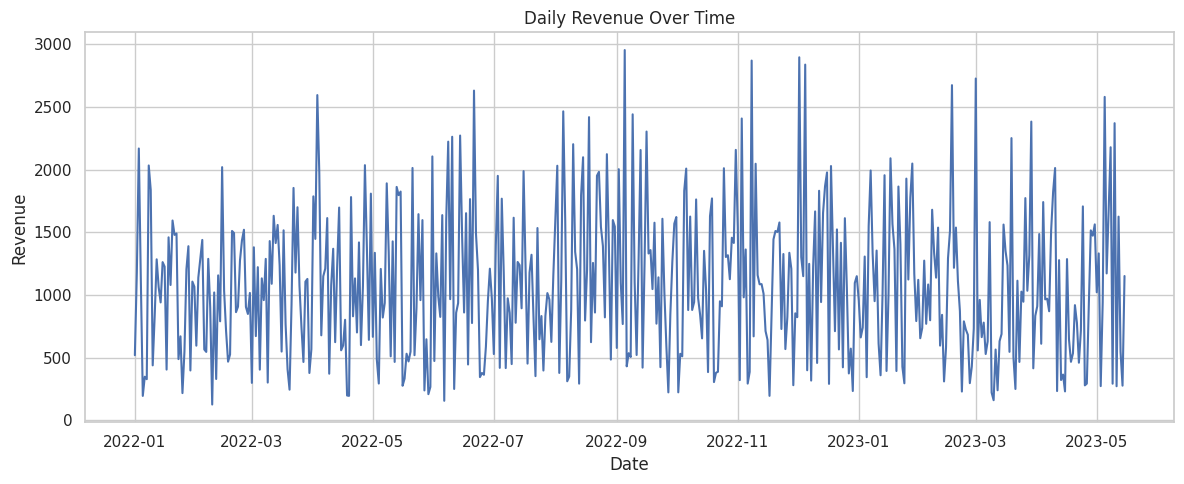

In [3]:
df_time = df_sales.groupby("Date")["Revenue"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_time, x="Date", y="Revenue")
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

### Observations:
Volatility: Revenue varies significantly from day to day, ranging roughly between $200 and nearly $3,000.

No strong trend: There’s no consistent upward or downward trend across the full time span, suggesting sales remain relatively stable overall but noisy.

Possible seasonality: There are periods where spikes are more frequent — this could indicate promotions, holidays, or product launches.

Outliers: Several sharp revenue peaks may represent exceptional sales days — useful to investigate further (e.g., by filtering top 10 days).

## 🛒 Total Revenue by Product

/tmp/ipykernel_302218/1826920503.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sales, x="Product", y="Revenue", estimator=sum, ci=None)


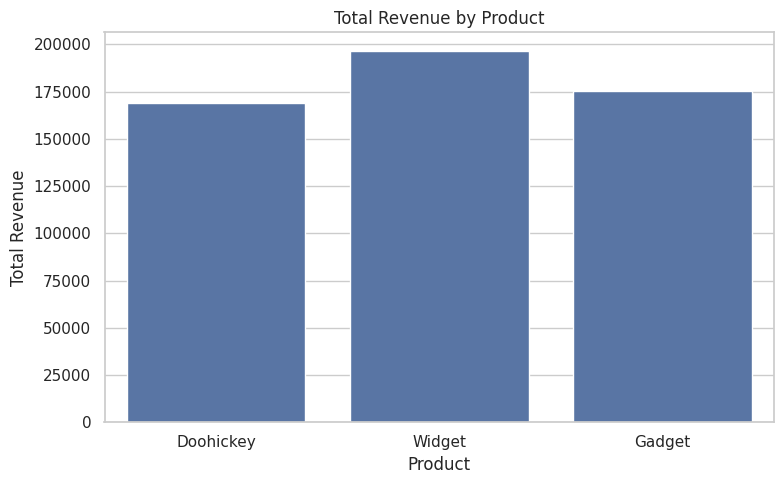

In [4]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sales, x="Product", y="Revenue", estimator=sum, ci=None)
plt.title("Total Revenue by Product")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### Observations:
Widget is the top-performing product, with nearly $200,000 in total revenue.

Gadget follows closely behind, while Doohickey lags slightly behind the other two.

The differences, while not drastic, suggest Widget may have either a higher unit price or stronger consistent sales.

Widget might be the best candidate for promotions or bundling due to its strong revenue performance.

Doohickey may benefit from pricing strategy adjustments or targeted marketing to increase visibility and sales.

Further breakdown by store or month could help identify where each product performs best.



## 🏬 Revenue by Store

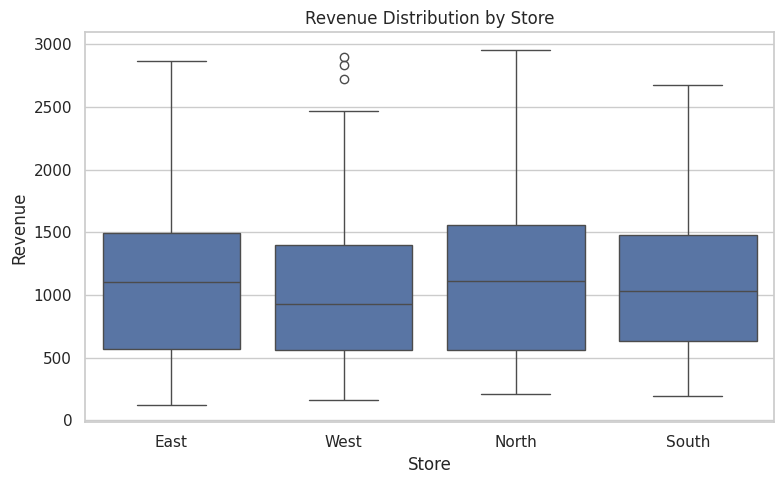

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_sales, x="Store", y="Revenue")
plt.title("Revenue Distribution by Store")
plt.tight_layout()
plt.show()

### Observations:
North and East stores appear to have the highest median revenues, suggesting they perform better on average.

West store has slightly lower median revenue and more noticeable outliers — days with exceptionally high sales.

All stores have a wide interquartile range (IQR), meaning revenue fluctuates considerably.

The North store shows both strong median performance and high maximum values, possibly making it the best overall performer.

### Business Implications:
North and East stores could be models for operations, inventory, or marketing strategy.

West store’s outliers might signal successful promotions or sporadic demand — worth investigating what caused the spikes.

South and West may need performance optimization or local promotion strategies.



## 📆 Monthly Revenue Trends

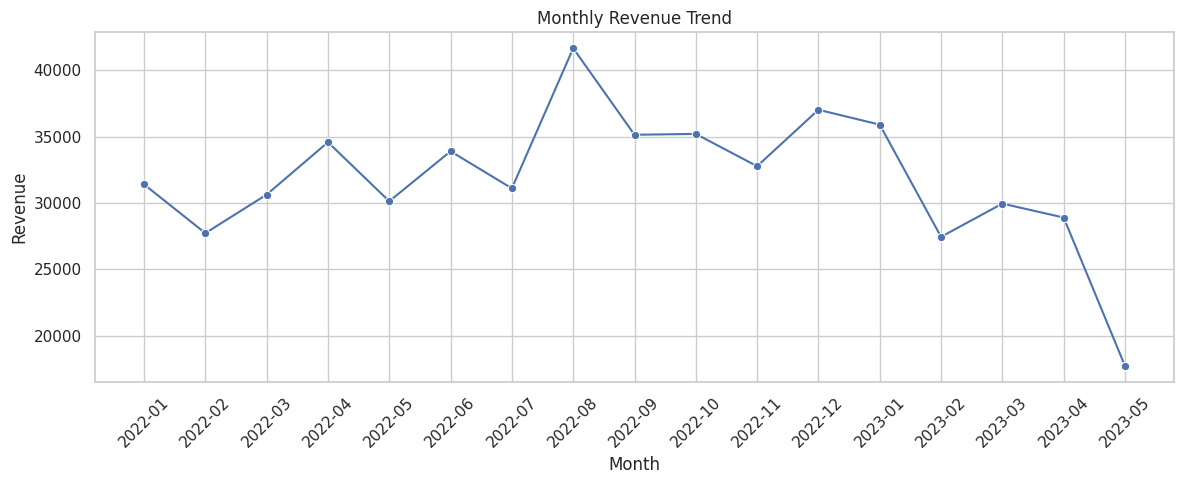

In [6]:
df_sales["Month"] = df_sales["Date"].dt.to_period("M").astype(str)
monthly = df_sales.groupby("Month")["Revenue"].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x="Month", y="Revenue", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()

### Observations:
August 2022 marks the highest revenue peak, possibly due to seasonal effects, a campaign, or product launch.

A general upward trend is seen from February 2022 to August 2022, followed by relatively stable performance through early 2023.

A sharp drop in May 2023 suggests either incomplete data for that month or a significant decrease in performance.

Revenue dips in February (both years) could indicate seasonal slowdowns.

### Business Implications:
Identify what drove August 2022 success — replicating that strategy could boost future months.

Investigate the sharp drop in May 2023: if it's not due to missing data, it may signal operational or market issues.

Planning ahead for weaker months (like February) with promotions may help balance the revenue curve.

## 🔥 Heatmap: Product vs Store Revenue

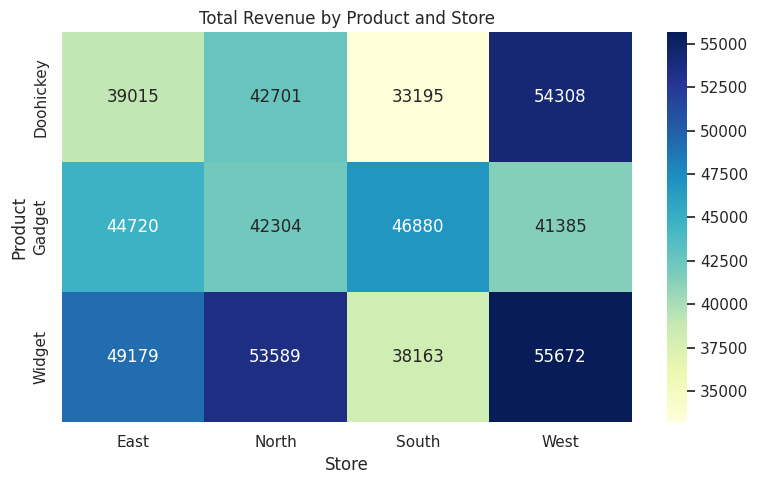

In [7]:
pivot = df_sales.pivot_table(index="Product", columns="Store", values="Revenue", aggfunc="sum")
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Total Revenue by Product and Store")
plt.tight_layout()
plt.show()

### Observations:
Widget is the top performer overall, especially in the West and North stores — these two combos alone generate over $55,000 each.

Doohickey performs surprisingly well in the West store ($54,308), even though it's the weakest product overall.

South store shows the lowest revenue across all products, particularly with Doohickey — signaling a weak point in performance.

Gadget is the most consistent product across stores, with revenue staying within a tighter range (~$42k–$47k).

### Business Implications:
Consider focusing Widget marketing and inventory in the West and North — high ROI locations.

South store may need support: product placement, staff training, or promotions to improve sales.

Doohickey might have niche appeal — perhaps a premium product for select regions like the West.



## 🔍 Interactive Product Revenue Over Time

In [8]:
def plot_product_trend(product):
    df_product = df_sales[df_sales["Product"] == product]
    daily = df_product.groupby("Date")["Revenue"].sum().reset_index()
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=daily, x="Date", y="Revenue")
    plt.title(f"Revenue Over Time for {product}")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

interact(plot_product_trend, product=sorted(df_sales["Product"].unique()));

interactive(children=(Dropdown(description='product', options=('Doohickey', 'Gadget', 'Widget'), value='Doohic…

### Observations:

Revenue shows a highly irregular pattern, with many sharp spikes and drops — likely due to inconsistent sales volume.

There are multiple sales peaks above $2,000, especially around:

June–July 2022

October–November 2022

February and May 2023

Long stretches of low or near-zero revenue indicate that Doohickey may not sell consistently every day.

### Business Implications:
Doohickey might be a low-frequency, high-margin product — sold less often but at higher value when it does.

The sales bursts could align with campaigns, restocks, or external events — worth investigating exact causes.

Consider strategies like bundling or recurring promotions to stabilize its performance.

## Conclusion

This report explored sales revenue across multiple dimensions:

- Revenue grew and fluctuated over time.
- The top-selling products and best-performing stores were identified.
- Visual summaries help understand seasonal or categorical trends.